# 非凸関数のsaddle pointsについて

---

まず，saddle pointの定義としては局所的な極小値や極大値ではない点で，次の式を満たしている点です．

$$
f^{\prime}(x)=0
$$

もう一つの条件はHessian行列の固有値が正と負の両方を持つというものです．

教科書に書いてある説明では，最小の点でが，見方を変えると最大の点だということです．

鞍点を確認する利点の一つは関数の複雑さを確認するためです．

多ければ多いほど，関数は複雑に増減しているということです．


---

非凸関数で大域的な最適解を見つけるのは難しいです．

ニューラルネットワークも非凸関数の最適化の例ですね．

ニューラルネットワークの場合，目的関数が非凸関数で最小化，最大化したいわけですね．

しかしながら，大域的な最適解を見つけるのは実際してなくて，局所的な最適解を出しています．

それでも，いい性能を出しているので，普及している要因の一つだと思います．

---

次の関数の最小化を考えてみましょう．

$$
f(x)=x^4-4 \cdot x^2+4
$$

この関数の図は下のようになります．

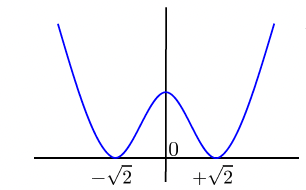

最小となる点$\{-\sqrt{2}, \sqrt{2}\}$が二つありますね．


最小となる点が2つある場合，どの最小値を選ぶべきなのか困りますね．

他にも初期値によって最小となる点が変わってしまい，一意性が欠如してしまいます．

その例を次の初歩的な最適化手法で確認します，

$$
\mathbf{x}^{t+1}=\mathbf{x}^t-\eta_t \cdot \nabla f\left(\mathbf{x}^t\right)
$$

上では1変数関数を例に出したのですが，多変数になると，局所最適化との区別で鞍点が重要になってきます．




In [1]:
import jax
import jax.numpy as jnp

def f(x):
    return x**4 - 4*x**2 + 4

@jax.jit
def update_rule(x, eta):
    grad = jax.grad(f)(x)
    x_new = x - eta * grad
    return x_new

# 初期値の設定
x_init = jnp.array(-1.0)
eta = 0.1  # 学習率
x = x_init
# 更新ルールの実行
for i in range(20):  
    x = update_rule(x, eta)

print(f'初期値を{x_init}にしたときの最適解は{x}')

x_init = jnp.array(1.0)
x = x_init
for i in range(20):  
    x = update_rule(x, eta)

print(f'初期値を{x_init}にしたときの最適解は{x}')

初期値を-1.0にしたときの最適解は-1.4142143726348877
初期値を1.0にしたときの最適解は1.4142143726348877


上の例から分かるように答えは初期値によって変わりますね．

上のアルゴリズムでは，$\nabla f(\mathbf{x})=\mathbf{0}$.で勾配が消失してしまい，局所最適化に陥ってしまう可能性があります．

その時に1番最初に説明したHessian行列を使い，局所最適解と区別することも可能です．

---